<a href="https://colab.research.google.com/github/ibzan79/BEDU/blob/main/fase_3_mod_1_proyecto_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import pandas as pd

from scipy import stats
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis

import pprint as pp

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/IsmaelOr/Proyecto_Fase3_Modulo1_Equipo9/main/Files/enfermedades_cardiovasculares.csv', index_col = 0)

df.head()

,edad,genero,estatura,peso,imc,presion_sistolica,presion_diastolica,colesterol,glucosa,tabaco,alcohol,act_fisica,enfermedad_cardiovascular
0,50,2,168,62.0,21.97,110,80,1,1,0,0,1,0
1,55,1,156,85.0,34.93,140,90,3,1,0,0,1,1
2,51,1,165,64.0,23.51,130,70,3,1,0,0,0,1
3,48,2,169,82.0,28.71,150,100,1,1,0,0,1,1
4,47,1,156,56.0,23.01,100,60,1,1,0,0,0,0


## Postwork 1 - Estimados de locación y variabilidad

* Identifica las columnas de tu dataset que tengan datos numéricos.
    - edad
    - estatura
    - peso
    - imc
    - presion_sistolica
    - presion_diastolica


In [3]:
est_loc = df.describe().T

est_loc = est_loc.drop(index = ['genero', 'colesterol', 'glucosa', 'tabaco', 'alcohol', 'act_fisica', 'enfermedad_cardiovascular'], columns = ['count'])

est_loc

,mean,std,min,25%,50%,75%,max
edad,52.840671,6.766774,29.00,48.00,53.000,58.00,64.00
estatura,164.359229,8.210126,55.00,159.00,165.000,170.00,250.00
peso,74.205690,14.395757,10.00,65.00,72.000,82.00,200.00
imc,27.556545,6.091405,3.47,23.88,26.375,30.22,298.67
presion_sistolica,128.817286,154.011419,-150.00,120.00,120.000,140.00,16020.00
presion_diastolica,96.630414,188.472530,-70.00,80.00,80.000,90.00,11000.00


In [176]:
variables_numericas = ['edad', 'estatura', 'peso', 'imc', 'presion_sistolica', 'presion_diastolica']
columnas = ['promedio', 'mediana', 'media_truncada', 'desviacion_estandar', 'rango', '25%', '50%', '75%', 'rango_intercuartil']

estimados_loc = pd.DataFrame(index = variables_numericas)

datos = []

for columna in columnas:
    if columna == 'promedio':
        for i in range(len(variables_numericas)):
            datos.append(df[variables_numericas[i]].mean())
        estimados_loc.insert(0, column = columna, value = datos)
    elif columna == 'mediana':
        for i in range(len(variables_numericas)):
            datos.append(df[variables_numericas[i]].median())
        estimados_loc.insert(1, column = columna, value = datos)
    elif columna == 'media_truncada':
        for i in range(len(variables_numericas)):
            datos.append(stats.trim_mean(df[variables_numericas[i]], 0.1))
        estimados_loc.insert(2, column = columna, value = datos)
    elif columna == 'desviacion_estandar':
        for i in range(len(variables_numericas)):
            datos.append(df[variables_numericas[i]].std())
        estimados_loc.insert(3, column = columna, value = datos)
    elif columna == 'rango':
        for i in range(len(variables_numericas)):
            datos.append(df[variables_numericas[i]].max() - df[variables_numericas[i]].min())
        estimados_loc.insert(4, column = columna, value = datos)
    elif columna == '25%':
        for i in range(len(variables_numericas)):
            datos.append(df[variables_numericas[i]].quantile(0.25))
        estimados_loc.insert(5, column = columna, value = datos)
    elif columna == '50%':
        for i in range(len(variables_numericas)):
            datos.append(df[variables_numericas[i]].quantile(0.5))
        estimados_loc.insert(6, column = columna, value = datos)
    elif columna == '75%':
        for i in range(len(variables_numericas)):
            datos.append(df[variables_numericas[i]].quantile(0.75))
        estimados_loc.insert(7, column = columna, value = datos)
    elif columna == 'rango_intercuartil':
        for i in range(len(variables_numericas)):
            datos.append(df[variables_numericas[i]].quantile(0.75) - df[variables_numericas[i]].quantile(0.25))
        estimados_loc.insert(8, column = columna, value = datos)
    datos = []

estimados_loc

,promedio,mediana,media_truncada,desviacion_estandar,rango,25%,50%,75%,rango_intercuartil
edad,52.840671,53.000,53.107179,6.766774,35.0,48.00,53.000,58.00,10.00
estatura,164.359229,165.000,164.322589,8.210126,195.0,159.00,165.000,170.00,11.00
peso,74.205690,72.000,73.109631,14.395757,190.0,65.00,72.000,82.00,17.00
imc,27.556545,26.375,26.964394,6.091405,295.2,23.88,26.375,30.22,6.34
presion_sistolica,128.817286,120.000,125.604875,154.011419,16170.0,120.00,120.000,140.00,20.00
presion_diastolica,96.630414,80.000,81.276875,188.472530,11070.0,80.00,80.000,90.00,10.00


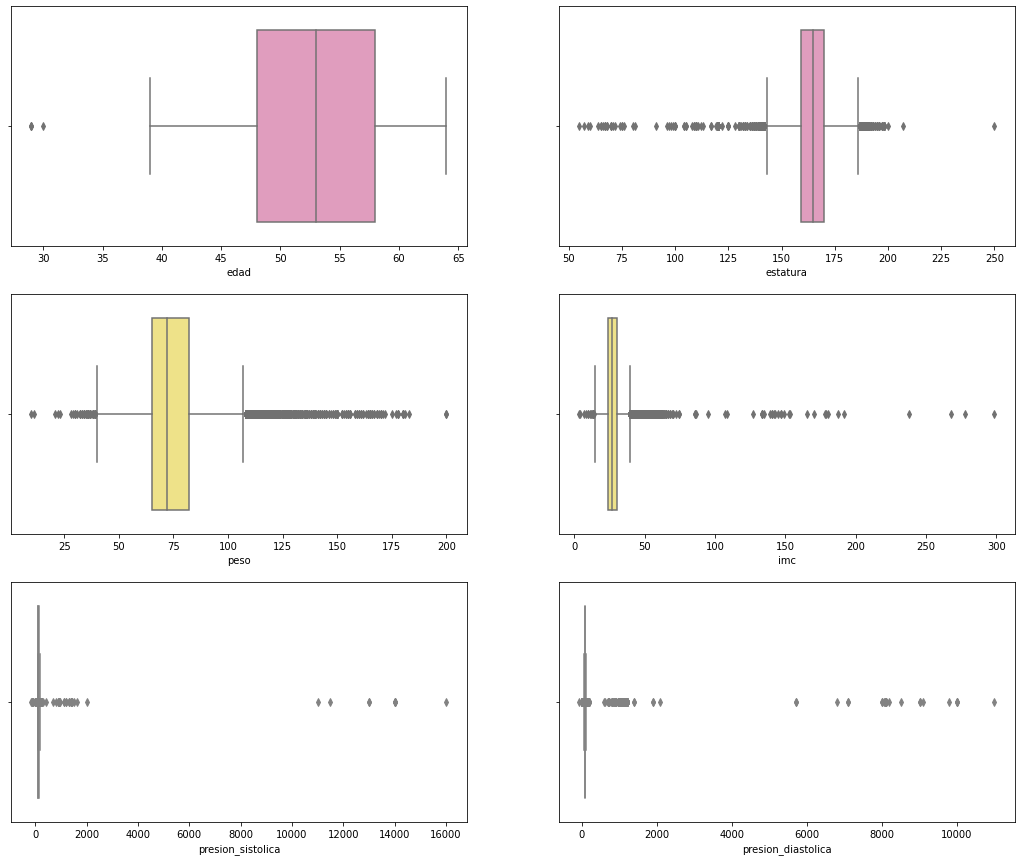

In [178]:
fig = plt.figure(figsize = (18, 15))
axes = fig.subplots(3, 2, sharex = False, sharey = False)

palette = ['#EB92BE', '#FFEF78', '#B1FFFD']

sns.boxplot(x = df['edad'], ax = axes[0, 0], color = palette[0]);
sns.boxplot(x = df['estatura'], ax = axes[0, 1], color = palette[0]);
sns.boxplot(x = df['peso'], ax = axes[1, 0], color = palette[1]);
sns.boxplot(x = df['imc'], ax = axes[1, 1], color = palette[1]);
sns.boxplot(x = df['presion_sistolica'], ax = axes[2, 0], color = palette[2]);
sns.boxplot(x = df['presion_diastolica'], ax = axes[2, 1], color = palette[2]);

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,70000.0,52.840671,6.766774,29.00,48.00,53.000,58.00,64.00
genero,70000.0,1.349571,0.476838,1.00,1.00,1.000,2.00,2.00
estatura,70000.0,164.359229,8.210126,55.00,159.00,165.000,170.00,250.00
peso,70000.0,74.205690,14.395757,10.00,65.00,72.000,82.00,200.00
imc,70000.0,27.556545,6.091405,3.47,23.88,26.375,30.22,298.67
presion_sistolica,70000.0,128.817286,154.011419,-150.00,120.00,120.000,140.00,16020.00
presion_diastolica,70000.0,96.630414,188.472530,-70.00,80.00,80.000,90.00,11000.00
colesterol,70000.0,1.366871,0.680250,1.00,1.00,1.000,2.00,3.00
glucosa,70000.0,1.226457,0.572270,1.00,1.00,1.000,1.00,3.00
tabaco,70000.0,0.088129,0.283484,0.00,0.00,0.000,0.00,1.00


In [10]:
def filtro_IQR(serie):
  iqr = serie.quantile(0.75) - serie.quantile(0.25)
  filtrado = (serie > serie.quantile(0.25) - (iqr * 1.5)) & (serie < serie.quantile(0.75) + (iqr * 1.5))
  return filtrado

In [11]:
df_final = df.copy()

for columna in variables_numericas:
    df_final = df_final[filtro_IQR(df_final[columna])]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

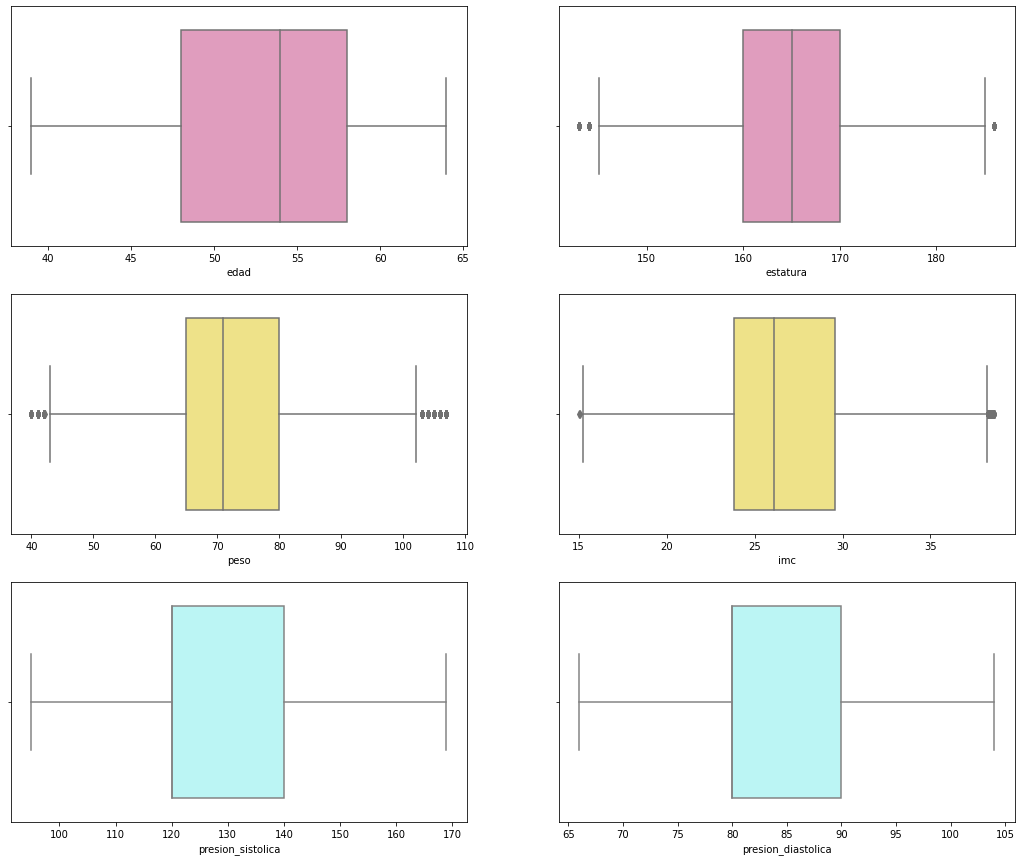

In [12]:
fig = plt.figure(figsize = (18, 15))
axes = fig.subplots(3, 2, sharex = False, sharey = False)

sns.boxplot(df_final['edad'], ax = axes[0, 0], color = palette[0]);
sns.boxplot(df_final['estatura'], ax = axes[0, 1], color = palette[0]);
sns.boxplot(df_final['peso'], ax = axes[1, 0], color = palette[1]);
sns.boxplot(df_final['imc'], ax = axes[1, 1], color = palette[1]);
sns.boxplot(df_final['presion_sistolica'], ax = axes[2, 0], color = palette[2]);
sns.boxplot(df_final['presion_diastolica'], ax = axes[2, 1], color = palette[2]);

In [13]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,60646.0,52.872819,6.742372,39.00,48.00,54.00,58.00,64.00
genero,60646.0,1.354731,0.478436,1.00,1.00,1.00,2.00,2.00
estatura,60646.0,164.581209,7.474087,143.00,160.00,165.00,170.00,186.00
peso,60646.0,72.693673,11.830436,40.00,65.00,71.00,80.00,107.00
imc,60646.0,26.858322,4.198569,15.04,23.83,26.12,29.59,38.63
presion_sistolica,60646.0,126.046120,13.650486,95.00,120.00,120.00,140.00,169.00
presion_diastolica,60646.0,81.585892,7.541923,66.00,80.00,80.00,90.00,104.00
colesterol,60646.0,1.350477,0.669656,1.00,1.00,1.00,1.00,3.00
glucosa,60646.0,1.217574,0.564981,1.00,1.00,1.00,1.00,3.00
tabaco,60646.0,0.087541,0.282628,0.00,0.00,0.00,0.00,1.00


In [14]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60646 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       60646 non-null  int64  
 1   genero                     60646 non-null  int64  
 2   estatura                   60646 non-null  int64  
 3   peso                       60646 non-null  float64
 4   imc                        60646 non-null  float64
 5   presion_sistolica          60646 non-null  int64  
 6   presion_diastolica         60646 non-null  int64  
 7   colesterol                 60646 non-null  int64  
 8   glucosa                    60646 non-null  int64  
 9   tabaco                     60646 non-null  int64  
 10  alcohol                    60646 non-null  int64  
 11  act_fisica                 60646 non-null  int64  
 12  enfermedad_cardiovascular  60646 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 6.5 MB


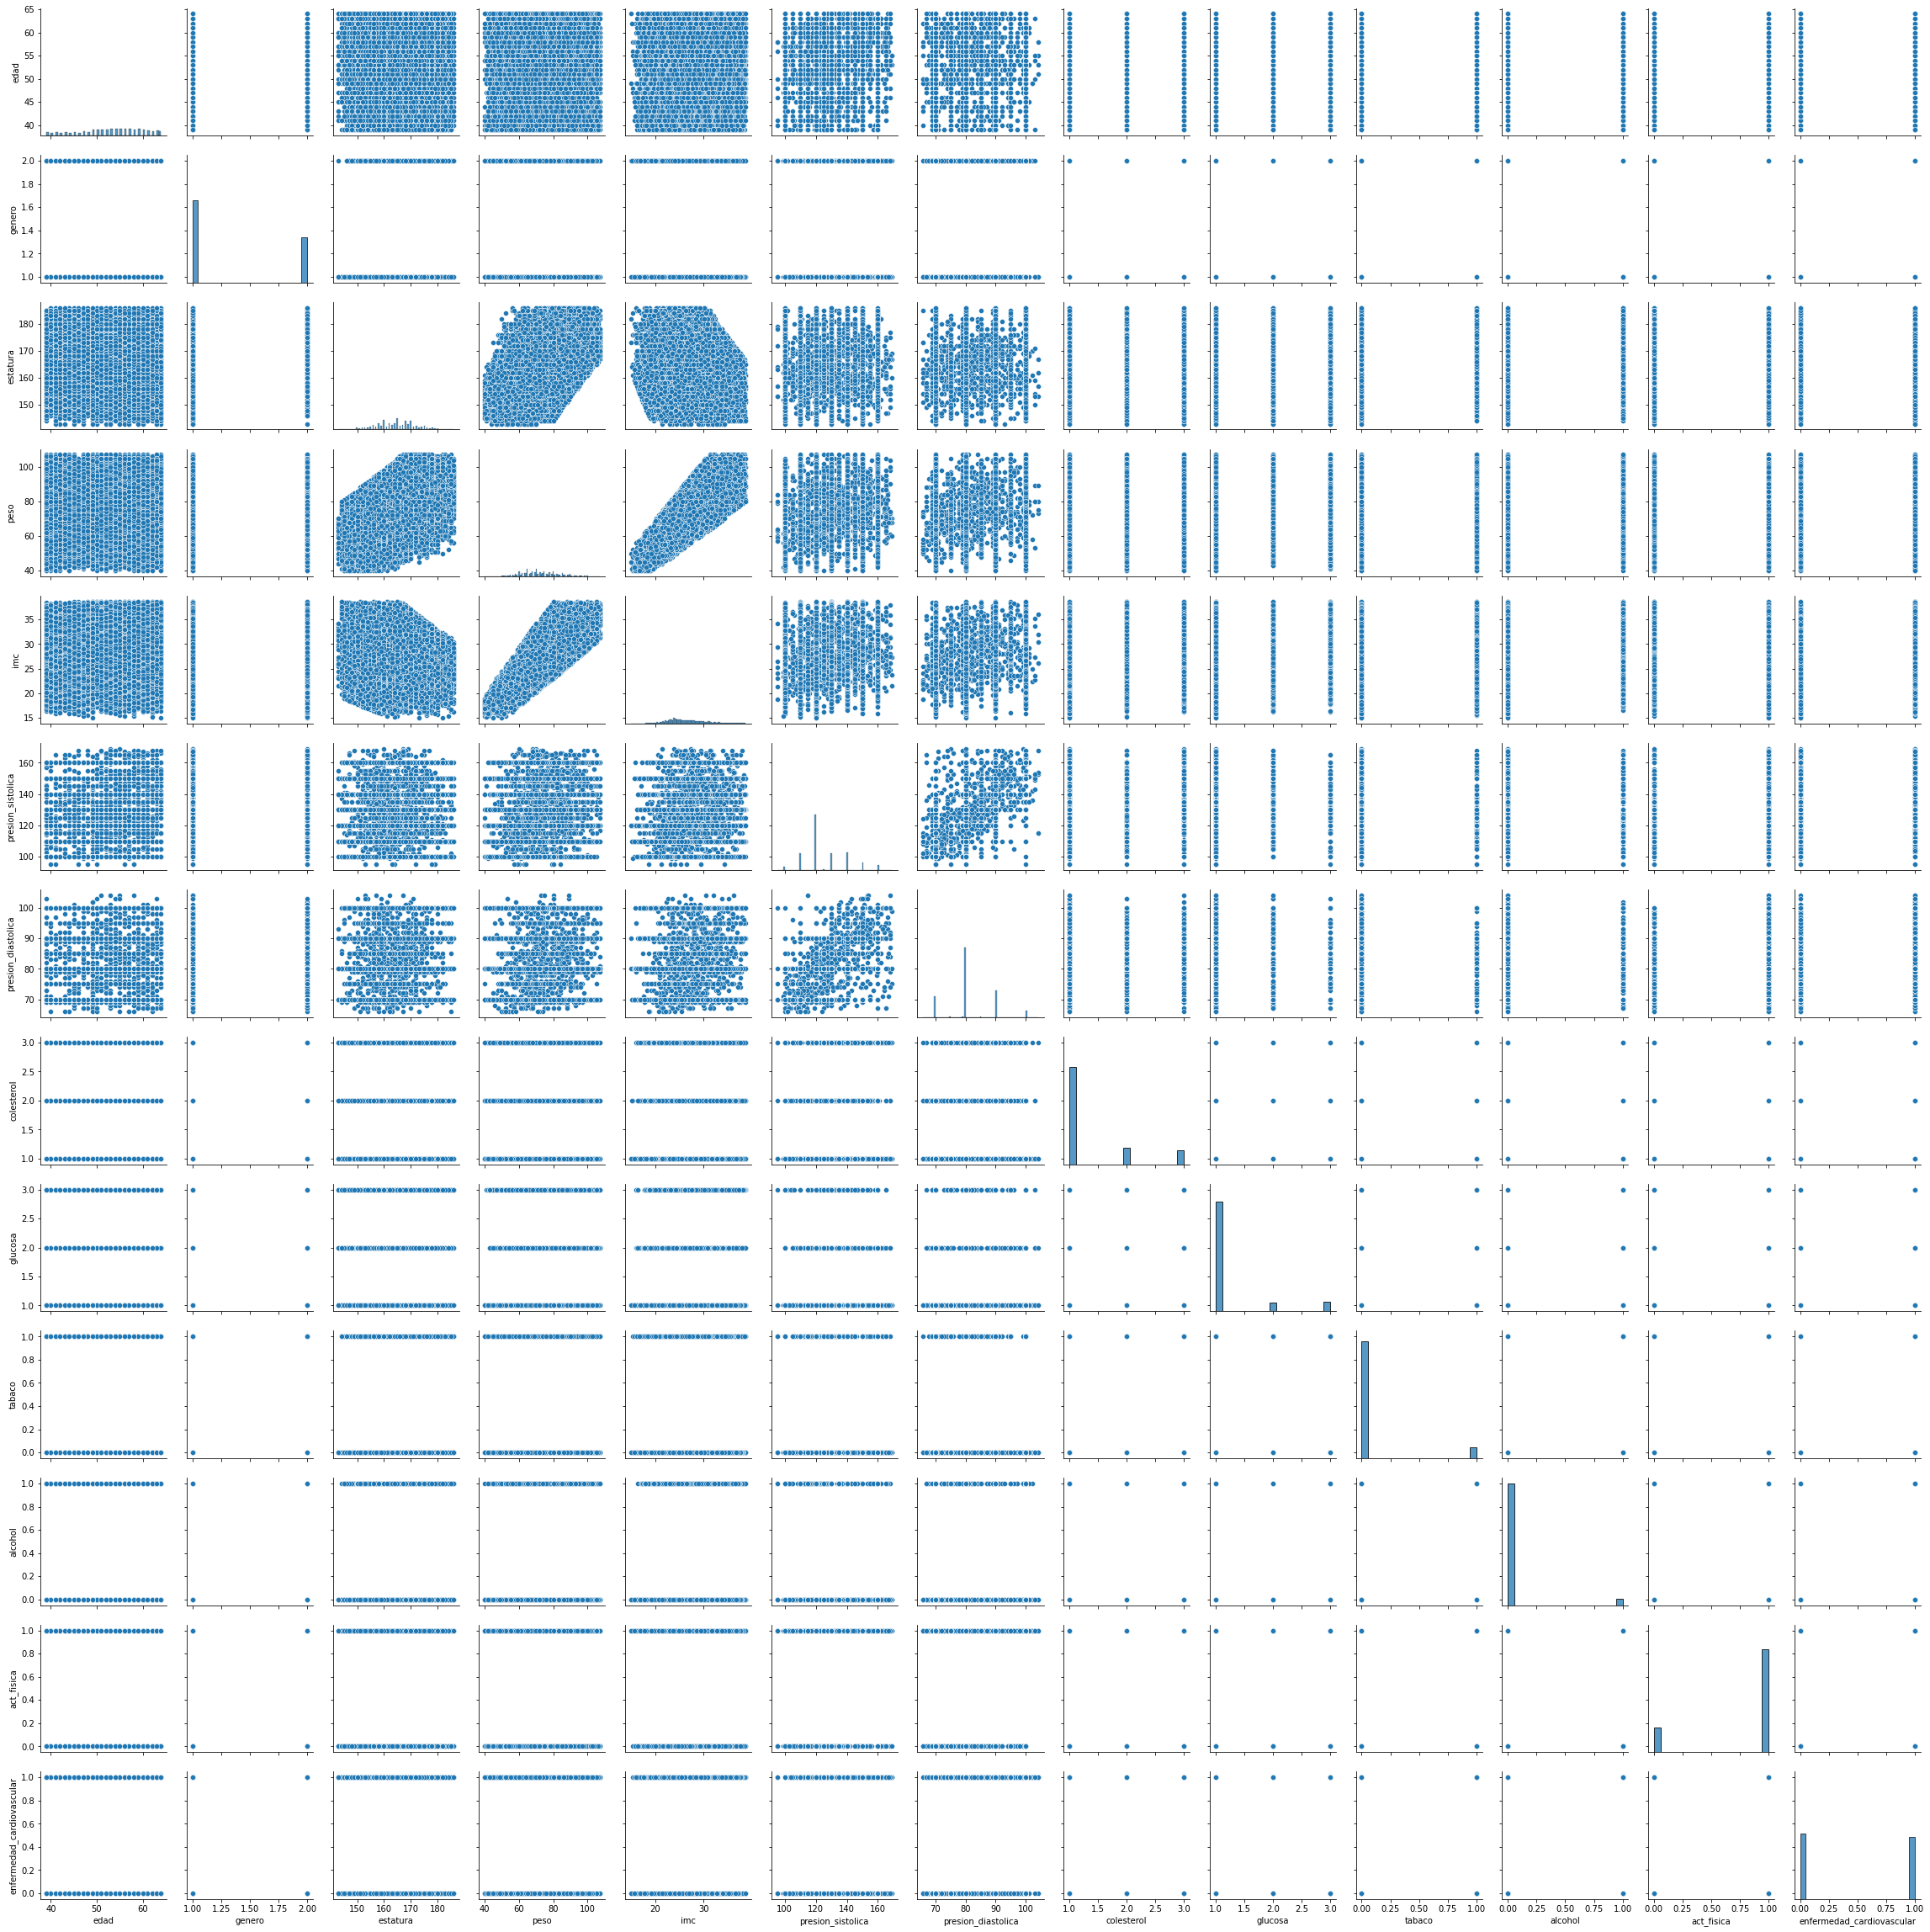

In [15]:
df_final.corr()
sns.pairplot(df_final)

* Utiliza tablas de frecuencia e histogramas para observar la distribución de tus variables. Caracteriza cada una de las distribuciones usando los términos que aprendiste durante la sesión. Obtén medidas de asimetría y curtosis para ver qué tan alejadas de la distribución normal están tus variables.

In [16]:
estaturas = df_final['estatura']

segmentos = pd.cut(estaturas, 10)

df_final['estatura'].groupby(segmentos).count()

estatura
(142.957, 147.3]      497
(147.3, 151.6]       1860
(151.6, 155.9]       4326
(155.9, 160.2]      12831
(160.2, 164.5]       9496
(164.5, 168.8]      13405
(168.8, 173.1]      10721
(173.1, 177.4]       4378
(177.4, 181.7]       2352
(181.7, 186.0]        780
Name: estatura, dtype: int64

In [85]:
for columna in variables_numericas:
    segmentos = pd.cut(df_final[columna], 10)
    print(f'Tabla de frecuencias de:')
    #print(f'{df_final[columna].groupby(segmentos).count()}\n\n')
    pp.pprint(df_final[columna].groupby(segmentos).count())
    print('\n\n')

Tabla de frecuencias de:
edad
(38.975, 41.5]    4508
(41.5, 44.0]      4271
(44.0, 46.5]      3195
(46.5, 49.0]      6430
(49.0, 51.5]      5718
(51.5, 54.0]      9377
(54.0, 56.5]      6550
(56.5, 59.0]      9287
(59.0, 61.5]      5135
(61.5, 64.0]      6175
Name: edad, dtype: int64



Tabla de frecuencias de:
estatura
(142.957, 147.3]      497
(147.3, 151.6]       1860
(151.6, 155.9]       4326
(155.9, 160.2]      12831
(160.2, 164.5]       9496
(164.5, 168.8]      13405
(168.8, 173.1]      10721
(173.1, 177.4]       4378
(177.4, 181.7]       2352
(181.7, 186.0]        780
Name: estatura, dtype: int64



Tabla de frecuencias de:
peso
(39.933, 46.7]      340
(46.7, 53.4]       1833
(53.4, 60.1]       7201
(60.1, 66.8]      10351
(66.8, 73.5]      14423
(73.5, 80.2]      12102
(80.2, 86.9]       6270
(86.9, 93.6]       4734
(93.6, 100.3]      2530
(100.3, 107.0]      862
Name: peso, dtype: int64



Tabla de frecuencias de:
imc
(15.016, 17.399]      160
(17.399, 19.758]     1092
(19.758

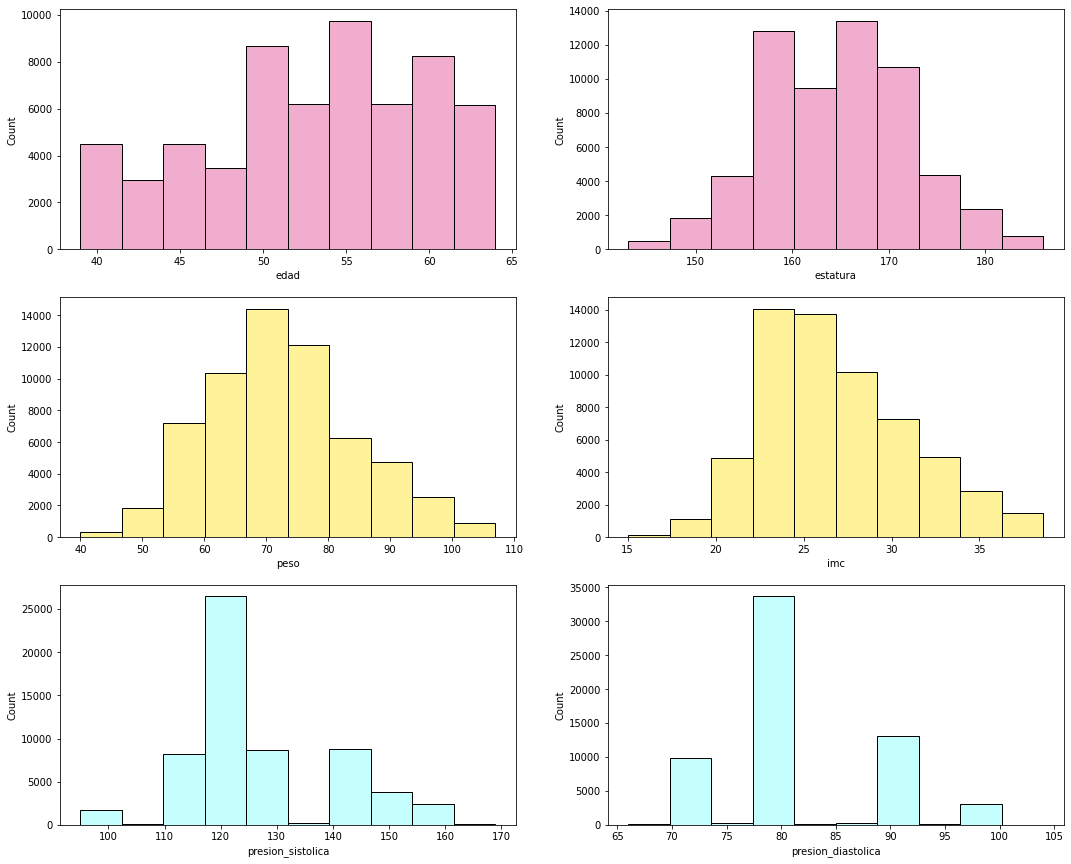

In [18]:
fig = plt.figure(figsize = (18, 15))
axes = fig.subplots(3, 2, sharex = False, sharey = False)

b = 10

sns.histplot(df_final['edad'], ax = axes[0, 0], color = palette[0], bins = b);
sns.histplot(df_final['estatura'], ax = axes[0, 1], color = palette[0], bins = b);
sns.histplot(df_final['peso'], ax = axes[1, 0], color = palette[1], bins = b);
sns.histplot(df_final['imc'], ax = axes[1, 1], color = palette[1], bins = b);
sns.histplot(df_final['presion_sistolica'], ax = axes[2, 0], color = palette[2], bins = b);
sns.histplot(df_final['presion_diastolica'], ax = axes[2, 1], color = palette[2], bins = b);

In [19]:
for columna in variables_numericas:
    print(f'Variable: "{columna}"')
    print(f'  - Curtosis: {kurtosis(df_final[columna])}')
    print(f'  - Asimetría: {skew(df_final[columna])}\n')

Variable: "edad"
  - Curtosis: -0.8146140960101342
  - Asimetría: -0.3080328194907456

Variable: "estatura"
  - Curtosis: -0.20330168866493326
  - Asimetría: 0.061574325519162074

Variable: "peso"
  - Curtosis: -0.1712200061859015
  - Asimetría: 0.3530246120129392

Variable: "imc"
  - Curtosis: -0.19248793142271703
  - Asimetría: 0.5237602333493007

Variable: "presion_sistolica"
  - Curtosis: 0.04182751309558208
  - Asimetría: 0.6988873669829082

Variable: "presion_diastolica"
  - Curtosis: 0.10324957761354359
  - Asimetría: 0.4543878916359017



* Utiliza gráficas de densidad para comparar una variable numérica que pueda ser segmentada en dos o más categorías. Usa esta técnica para entender mejor cómo están distribuidos tus datos en cada uno de los grupos presentes.

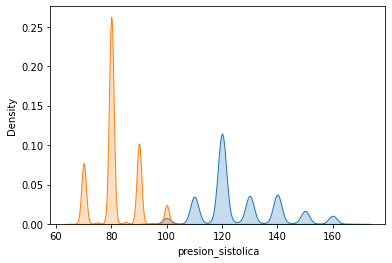

In [20]:
sns.kdeplot(df_final['presion_sistolica'], fill = True);
sns.kdeplot(df_final['presion_diastolica'], fill = True);

# Explicación de las presiones altas y bajas

## Postwork 3.

* Si ya tienes gráficas realizadas en Postworks anteriores, agrega títulos, anotaciones y leyendas donde sea necesario. También cambia el tamaño de las gráficas donde tenga sentido hacerlo.
* Identifica todas las variables categóricas en tu dataset.
    * Género.
    * Colesterol.
    * Glucosa.
    * Tabaco.
    * Alcohol.
    * Actividad física.
    * Enfermedad cardiovascular.
* Utiliza gráficas de barras para explorar la distribución de tus variables categóricas.


In [ ]:
var_categoricas = ['genero', 'colesterol', 'glucosa', 'tabaco', 'alcohol', 'act_fisica', 'enfermedad_cardiovascular']
conteos = []

for columna in var_categoricas:
    conteos.append(df_final[columna].value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

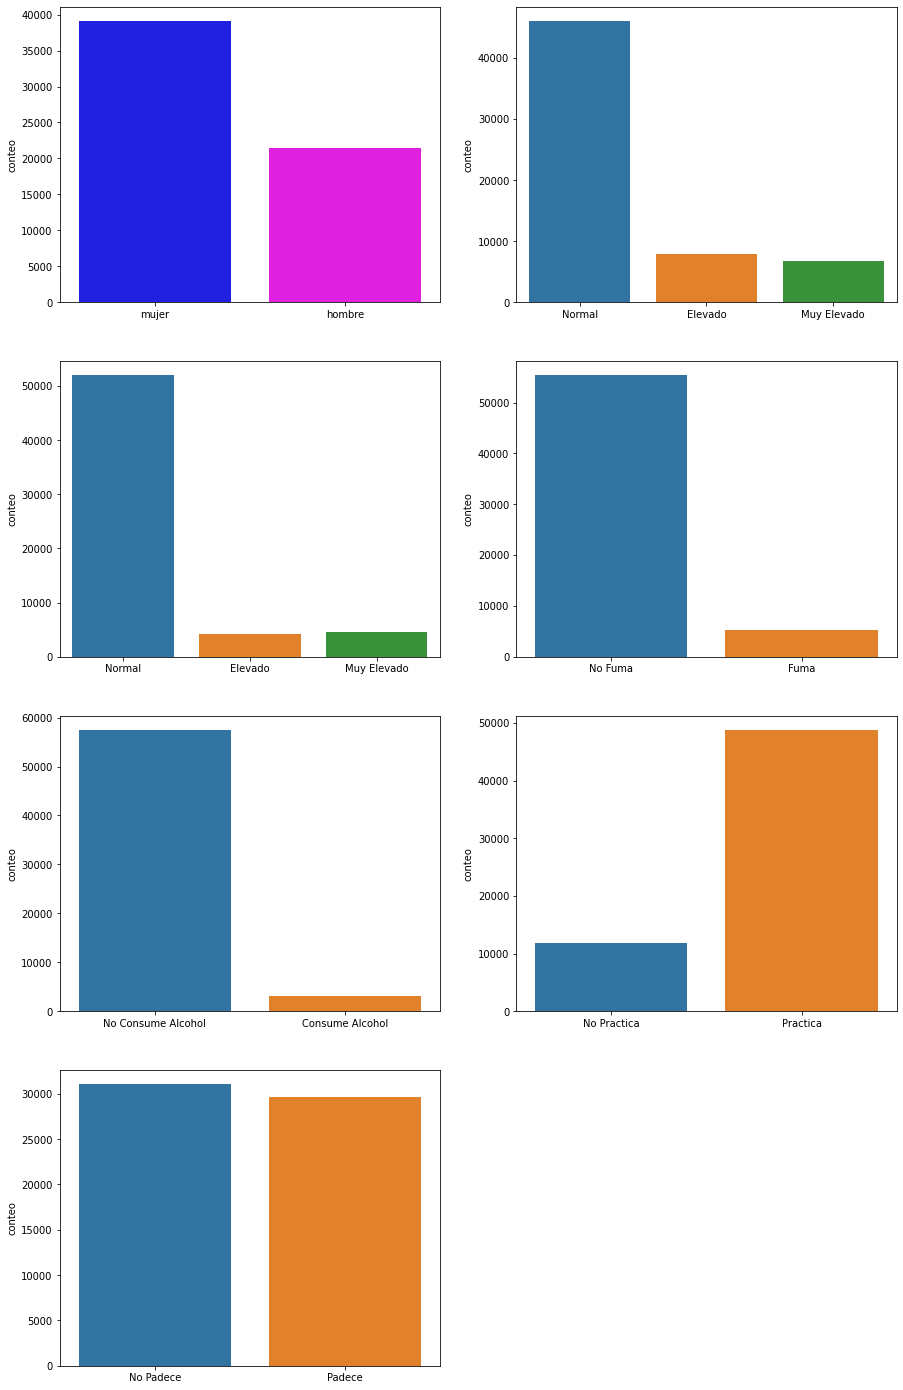

In [65]:
fig_2 = plt.figure(figsize = (15, 25))
axes = fig_2.subplots(4, 2, sharex = False, sharey = False)

g = sns.barplot(conteos[0].index, conteos[0], ax = axes[0, 0], palette = ['#0000FF', '#FF00FF']);
g.set(ylabel = 'conteo')
g.set_xticklabels(labels = ['mujer', 'hombre'])

c = sns.barplot(conteos[1].index, conteos[1], ax = axes[0, 1]);
c.set(ylabel = 'conteo')
c.set_xticklabels(labels = ['Normal', 'Elevado', 'Muy Elevado'])

gl = sns.barplot(conteos[2].index, conteos[2], ax = axes[1, 0]);
gl.set(ylabel = 'conteo')
gl.set_xticklabels(labels = ['Normal', 'Elevado', 'Muy Elevado'])

t = sns.barplot(conteos[3].index, conteos[3], ax = axes[1, 1]);
t.set(ylabel = 'conteo')
t.set_xticklabels(labels = ['No Fuma', 'Fuma'])

a = sns.barplot(conteos[4].index, conteos[4], ax = axes[2, 0]);
a.set(ylabel = 'conteo')
a.set_xticklabels(labels = ['No Consume Alcohol', 'Consume Alcohol'])

af = sns.barplot(conteos[5].index, conteos[5], ax = axes[2, 1]);
af.set(ylabel = 'conteo')
af.set_xticklabels(labels = ['No Practica', 'Practica'])

ec = sns.barplot(conteos[6].index, conteos[6], ax = axes[3, 0]);
ec.set(ylabel = 'conteo')
ec.set_xticklabels(labels = ['No Padece', 'Padece'])

axes[3, 1].set_axis_off()

Planea tu análisis multivariable: ¿qué combinaciones de variables categóricas podrían darme información útil acerca de la distribución de mis datos? ¿qué combinaciones de una variable numérica con una variable categórica podrían ser interesantes?

* genero - enfermedad cardiovascular
* colesterol - enfermedad cardiovascular
* glucosa - enfermedad cardiovascular
* tabaco - enfermedad cardiovascular
* alcohol - enfermedad cardiovascular
* actividad física - enfermedad cardiovascular

enfermedad_cardiovascular      0      1  total
genero                                        
1                          20010  19123  39133
2                          11024  10489  21513
total                      31034  29612  60646 




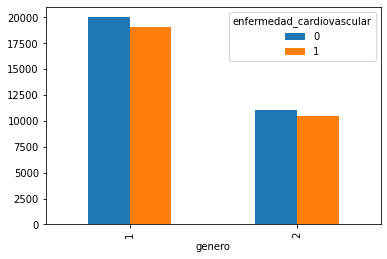

In [99]:
print(pd.crosstab(df_final['genero'], df_final['enfermedad_cardiovascular'], margins = True, margins_name = 'total'), '\n\n');

pd.crosstab(df_final['genero'], df_final['enfermedad_cardiovascular']).plot.bar(stacked = False);

enfermedad_cardiovascular      0      1  total
colesterol                                    
1                          26175  19911  46086
2                           3234   4631   7865
3                           1625   5070   6695
total                      31034  29612  60646 




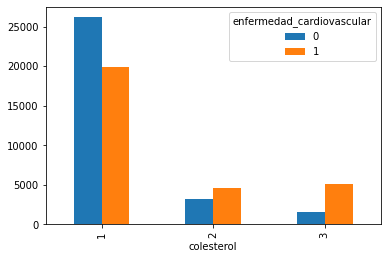

In [100]:
print(pd.crosstab(df_final['colesterol'], df_final['enfermedad_cardiovascular'], margins = True, margins_name = 'total'), '\n\n')

pd.crosstab(df_final['colesterol'], df_final['enfermedad_cardiovascular']).plot.bar(stacked = False);

enfermedad_cardiovascular      0      1  total
glucosa                                       
1                          27499  24469  51968
2                           1777   2384   4161
3                           1758   2759   4517
total                      31034  29612  60646 




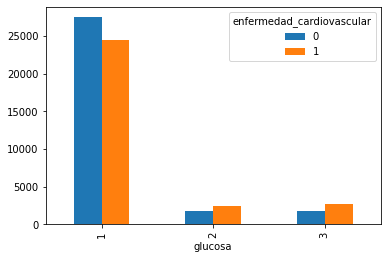

In [101]:
print(pd.crosstab(df_final['glucosa'], df_final['enfermedad_cardiovascular'], margins = True, margins_name = 'total'), '\n\n')

pd.crosstab(df_final['glucosa'], df_final['enfermedad_cardiovascular']).plot.bar(stacked = False);

enfermedad_cardiovascular      0      1  total
tabaco                                        
0                          28137  27200  55337
1                           2897   2412   5309
total                      31034  29612  60646 




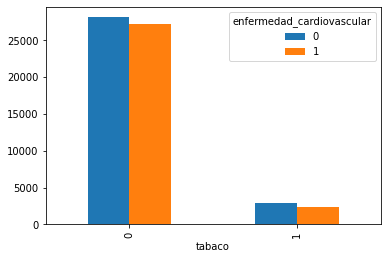

In [106]:
print(pd.crosstab(df_final['tabaco'], df_final['enfermedad_cardiovascular'], margins = True, margins_name = 'total'), '\n\n')

pd.crosstab(df_final['tabaco'], df_final['enfermedad_cardiovascular']).plot.bar(stacked = False);

enfermedad_cardiovascular      0      1  total
alcohol                                       
0                          29326  28155  57481
1                           1708   1457   3165
total                      31034  29612  60646 




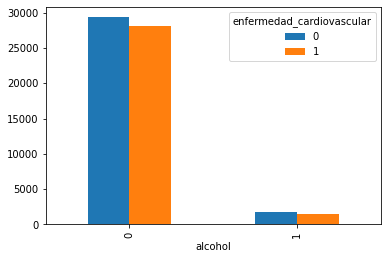

In [103]:
print(pd.crosstab(df_final['alcohol'], df_final['enfermedad_cardiovascular'], margins = True, margins_name = 'total'), '\n\n')

pd.crosstab(df_final['alcohol'], df_final['enfermedad_cardiovascular']).plot.bar(stacked = False);

enfermedad_cardiovascular      0      1  total
act_fisica                                    
0                           5618   6228  11846
1                          25416  23384  48800
total                      31034  29612  60646 




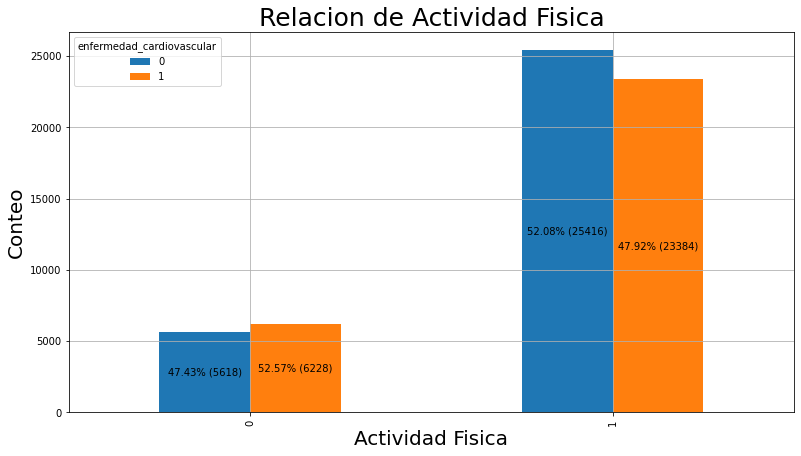

In [175]:
print(pd.crosstab(df_final['act_fisica'], df_final['enfermedad_cardiovascular'], margins = True, margins_name = 'total'), '\n\n')

df_generado = pd.crosstab(df_final['act_fisica'], df_final['enfermedad_cardiovascular']);
ax = df_generado.plot.bar(stacked = False, figsize = (13, 7));
ax.set_title("Relacion de Actividad Fisica", fontsize = 25);
ax.set_ylabel("Conteo", fontsize = 20);
ax.set_xlabel("Actividad Fisica", fontsize = 20)
ax.grid(True)

abs_values = df_generado.values
rel_values = abs_values / abs_values.sum(axis=1, keepdims = True) * 100

labels=zip(abs_values.T.flatten(), rel_values.T.flatten())

for path in ax.patches:
  abs_value, rel_value = next(labels)
  label = f"{rel_value:.2f}% ({abs_value})"
  width, height = path.get_width(), path.get_height()
  x, y = path.get_xy() 
  ax.text(x = x + width / 2, y = y + height / 2, s = label, horizontalalignment = 'center', verticalalignment = 'center')

enfermedad_cardiovascular      0      1
genero tabaco                          
1      0                   19652  18814
       1                     358    309
2      0                    8485   8386
       1                    2539   2103 




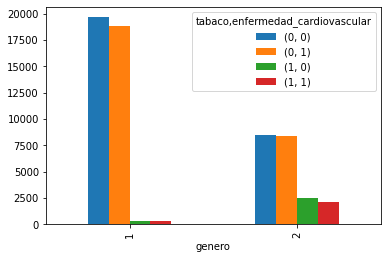

In [114]:
x = pd.crosstab(df_final['genero'], [df_final['tabaco'], df_final['enfermedad_cardiovascular']])
x = x.stack(level = 0)

print(x, '\n\n')

pd.crosstab(df_final['genero'], [df_final['tabaco'], df_final['enfermedad_cardiovascular']]).plot.bar(stacked = False);

enfermedad_cardiovascular      0      1
genero alcohol                         
1      0                   19514  18669
       1                     496    454
2      0                    9812   9486
       1                    1212   1003 




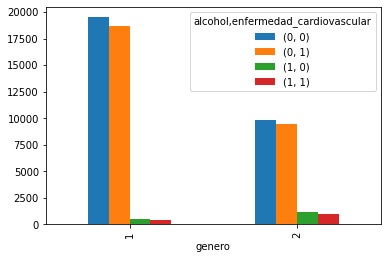

In [115]:
x = pd.crosstab(df_final['genero'], [df_final['alcohol'], df_final['enfermedad_cardiovascular']])
x = x.stack(level = 0)

print(x, '\n\n')

pd.crosstab(df_final['genero'], [df_final['alcohol'], df_final['enfermedad_cardiovascular']]).plot.bar(stacked = False);

enfermedad_cardiovascular      0      1
genero act_fisica                      
1      0                    3710   4016
       1                   16300  15107
2      0                    1908   2212
       1                    9116   8277 




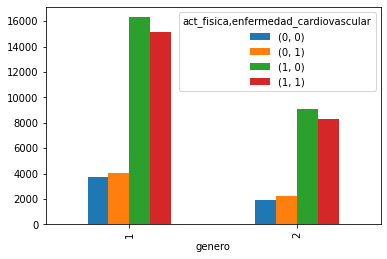

In [116]:
x = pd.crosstab(df_final['genero'], [df_final['act_fisica'], df_final['enfermedad_cardiovascular']])
x = x.stack(level = 0)

print(x, '\n\n')

pd.crosstab(df_final['genero'], [df_final['act_fisica'], df_final['enfermedad_cardiovascular']]).plot.bar(stacked = False);

* edad - enfermedad cardiovascular
* imc - glucosa
* imc - colesterol
* imc - enfermedad cardiovascular
* presion diastolica - enfermedad cardiovascular

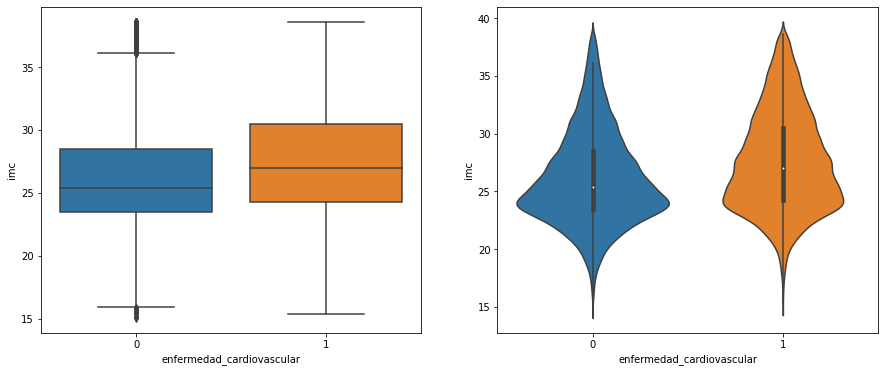

In [131]:
fig_3 = plt.figure(figsize = (15, 6))
axes = fig_3.subplots(1, 2, sharex = False, sharey = False)

sns.boxplot(data = df_final, x = 'enfermedad_cardiovascular', y = 'imc', ax = axes[0]);
sns.violinplot(data = df_final, x = 'enfermedad_cardiovascular', y = 'imc', ax = axes[1]);

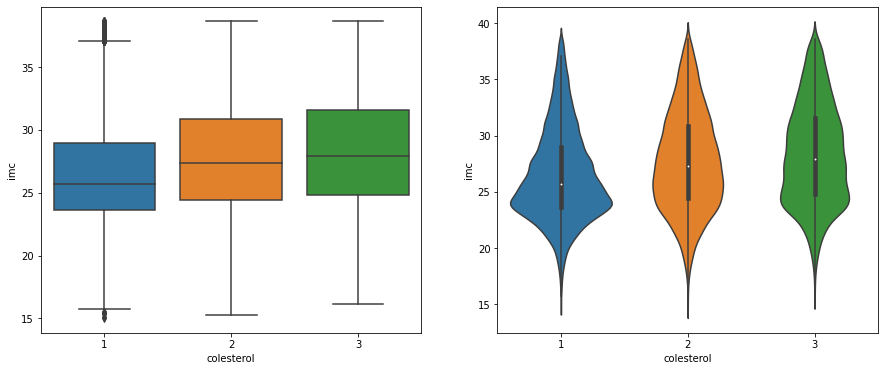

In [132]:
fig_3 = plt.figure(figsize = (15, 6))
axes = fig_3.subplots(1, 2, sharex = False, sharey = False)

sns.boxplot(data = df_final, x = 'colesterol', y = 'imc', ax = axes[0]);
sns.violinplot(data = df_final, x = 'colesterol', y = 'imc', ax = axes[1]);

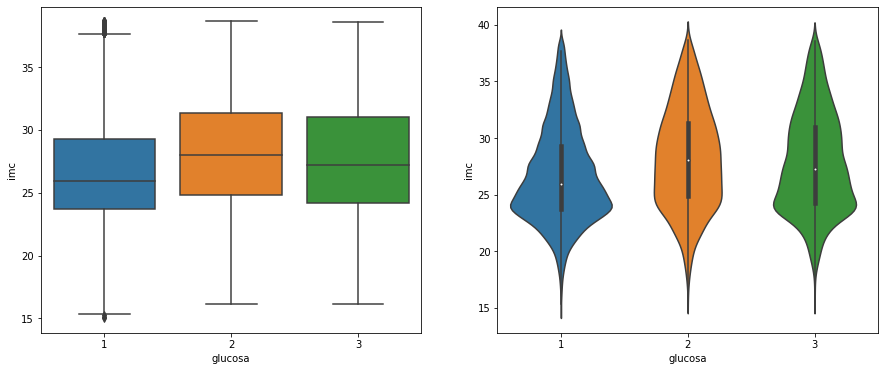

In [133]:
fig_3 = plt.figure(figsize = (15, 6))
axes = fig_3.subplots(1, 2, sharex = False, sharey = False)

sns.boxplot(data = df_final, x = 'glucosa', y = 'imc', ax = axes[0]);
sns.violinplot(data = df_final, x = 'glucosa', y = 'imc', ax = axes[1]);

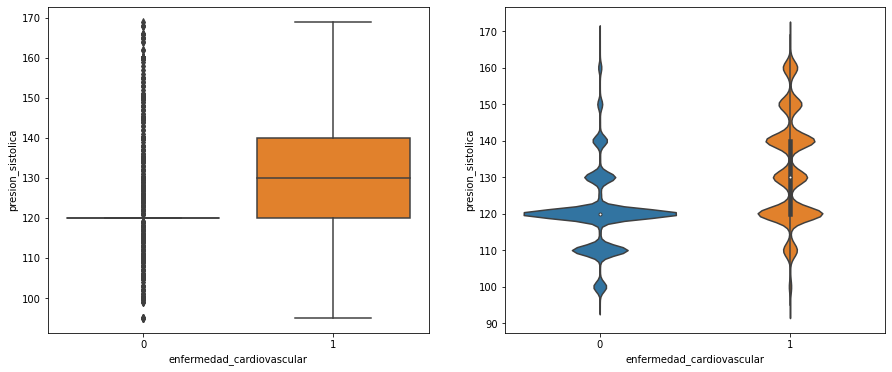

In [134]:
fig_3 = plt.figure(figsize = (15, 6))
axes = fig_3.subplots(1, 2, sharex = False, sharey = False)

sns.boxplot(data = df_final, x = 'enfermedad_cardiovascular', y = 'presion_sistolica', ax = axes[0]);
sns.violinplot(data = df_final, x = 'enfermedad_cardiovascular', y = 'presion_sistolica', ax = axes[1]);

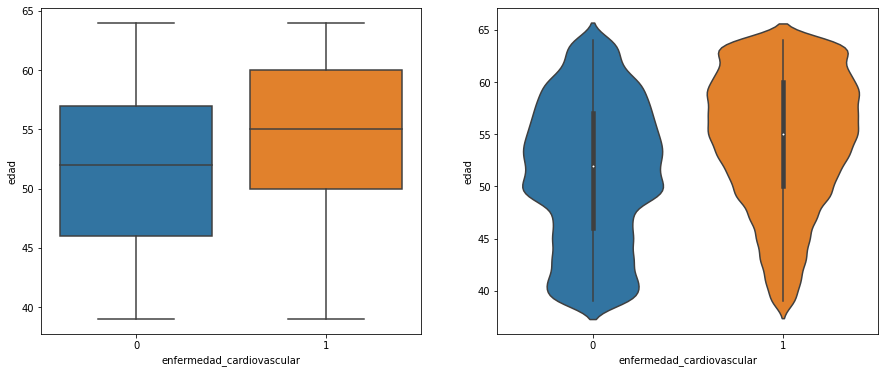

In [135]:
fig_3 = plt.figure(figsize = (15, 6))
axes = fig_3.subplots(1, 2, sharex = False, sharey = False)

sns.boxplot(data = df_final, x = 'enfermedad_cardiovascular', y = 'edad', ax = axes[0]);
sns.violinplot(data = df_final, x = 'enfermedad_cardiovascular', y = 'edad', ax = axes[1]);

## Postwork 4.

In [143]:
df_num = df.drop(columns = ['genero', 'colesterol', 'alcohol', 'glucosa', 'tabaco', 'act_fisica', 'enfermedad_cardiovascular'])

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       70000 non-null  int64  
 1   genero                     70000 non-null  int64  
 2   estatura                   70000 non-null  int64  
 3   peso                       70000 non-null  float64
 4   imc                        70000 non-null  float64
 5   presion_sistolica          70000 non-null  int64  
 6   presion_diastolica         70000 non-null  int64  
 7   colesterol                 70000 non-null  int64  
 8   glucosa                    70000 non-null  int64  
 9   tabaco                     70000 non-null  int64  
 10  alcohol                    70000 non-null  int64  
 11  act_fisica                 70000 non-null  int64  
 12  enfermedad_cardiovascular  70000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 7.5 MB


### Matriz de correlaciones de los valores completos.

In [144]:
df_num.corr()

,edad,estatura,peso,imc,presion_sistolica,presion_diastolica
edad,1.000000,-0.081506,0.053561,0.085403,0.020854,0.017620
estatura,-0.081506,1.000000,0.290968,-0.290642,0.005488,0.006150
peso,0.053561,0.290968,1.000000,0.762003,0.030702,0.043710
imc,0.085403,-0.290642,0.762003,1.000000,0.024851,0.035344
presion_sistolica,0.020854,0.005488,0.030702,0.024851,1.000000,0.016086
presion_diastolica,0.017620,0.006150,0.043710,0.035344,0.016086,1.000000


### Heatmap de los valores completos 

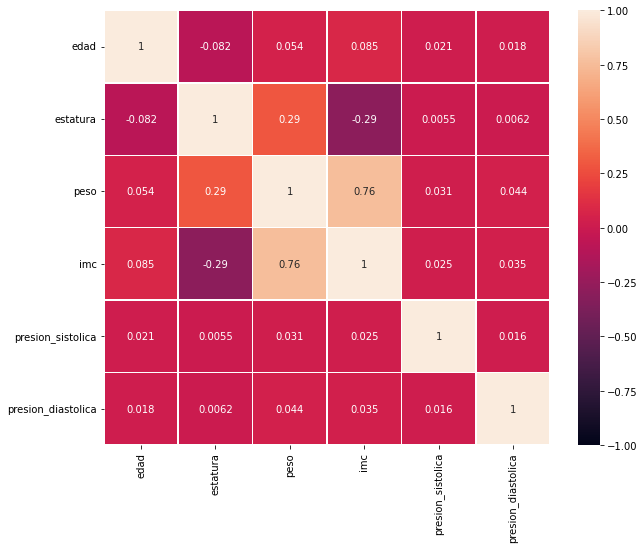

In [145]:
plt.figure(figsize = (10, 8))
sns.heatmap(df_num.corr(), vmin = -1, vmax = 1, annot = True, linewidths = 0.5)

### Pairplot (relaciones entre variables numéricas) de los valores completos.

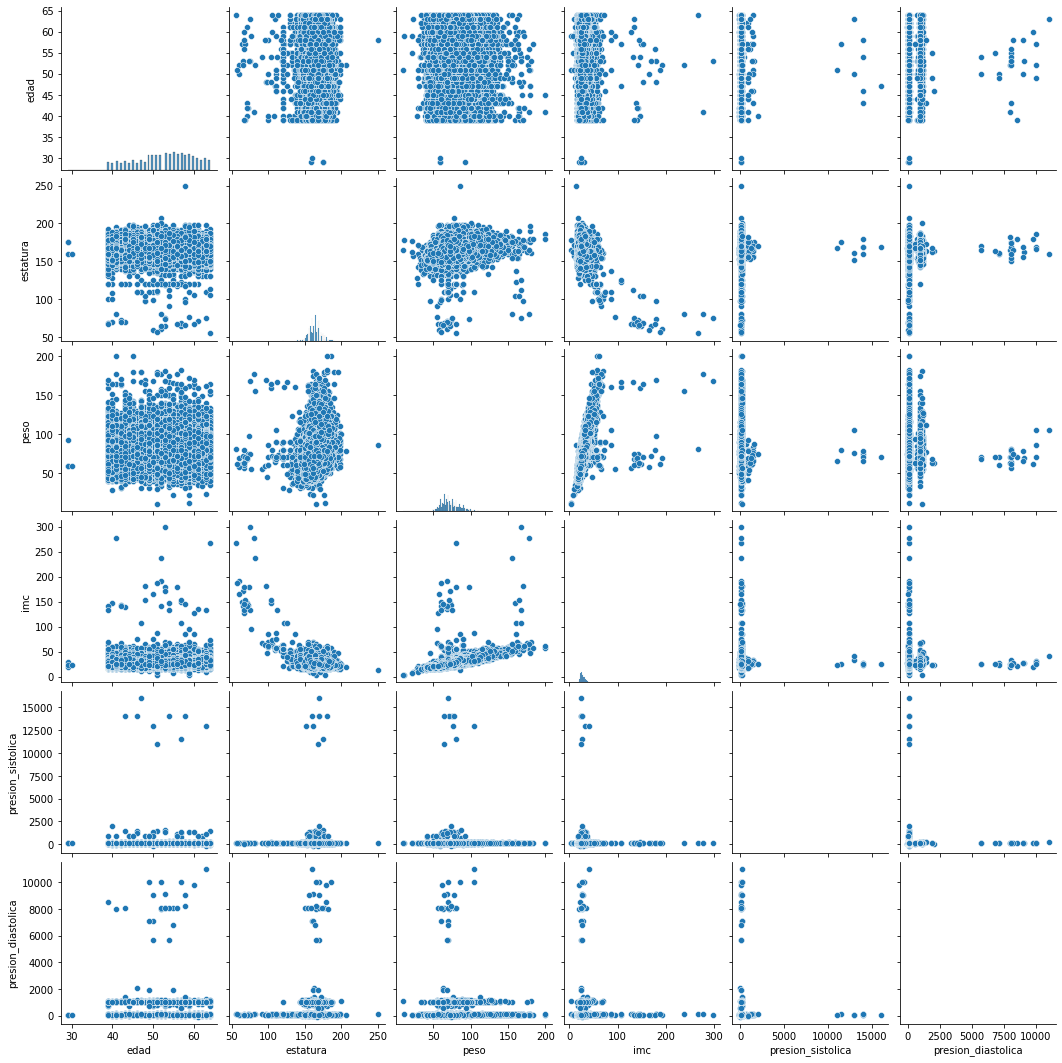

In [146]:
sns.pairplot(df_num);

# Explicar sobre las presiones.

### Dataframe final

Quitamos los valores atípicos y tenemos como resultado el siguiente Dataframe

In [147]:
df_final.head()

,edad,genero,estatura,peso,imc,presion_sistolica,presion_diastolica,colesterol,glucosa,tabaco,alcohol,act_fisica,enfermedad_cardiovascular
0,50,2,168,62.0,21.97,110,80,1,1,0,0,1,0
1,55,1,156,85.0,34.93,140,90,3,1,0,0,1,1
2,51,1,165,64.0,23.51,130,70,3,1,0,0,0,1
3,48,2,169,82.0,28.71,150,100,1,1,0,0,1,1
5,60,1,151,67.0,29.38,120,80,2,2,0,0,0,0


In [148]:
df_final_num = df_final.drop(columns = ['genero', 'colesterol', 'alcohol', 'glucosa', 'tabaco', 'act_fisica', 'enfermedad_cardiovascular'])

### Matriz de correlaciones sin los valores atípicos.

In [149]:
df_final_num.corr()

,edad,estatura,peso,imc,presion_sistolica,presion_diastolica
edad,1.000000,-0.091505,0.049047,0.106569,0.201349,0.143918
estatura,-0.091505,1.000000,0.368141,-0.201687,-0.001605,0.015340
peso,0.049047,0.368141,1.000000,0.832736,0.220683,0.203390
imc,0.106569,-0.201687,0.832736,1.000000,0.232543,0.204137
presion_sistolica,0.201349,-0.001605,0.220683,0.232543,1.000000,0.702934
presion_diastolica,0.143918,0.015340,0.203390,0.204137,0.702934,1.000000


### Heatmap sin los valores atípicos.

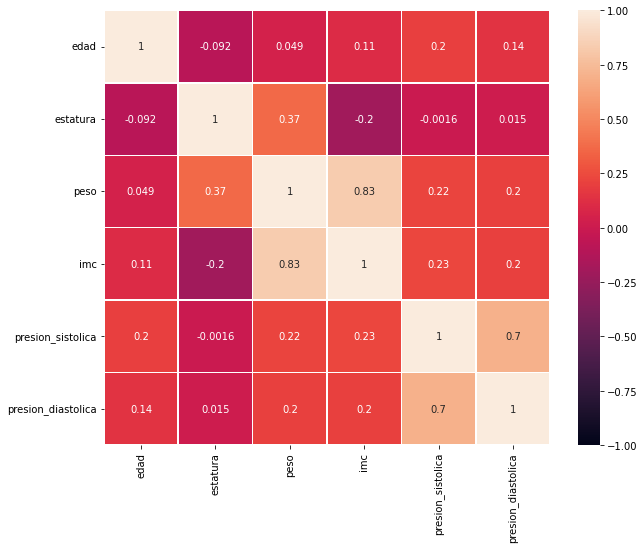

In [150]:
plt.figure(figsize = (10, 8))
sns.heatmap(df_final_num.corr(), vmin = -1, vmax = 1, annot = True, linewidths = 0.5)

### Pairplot sin los valores atípicos.

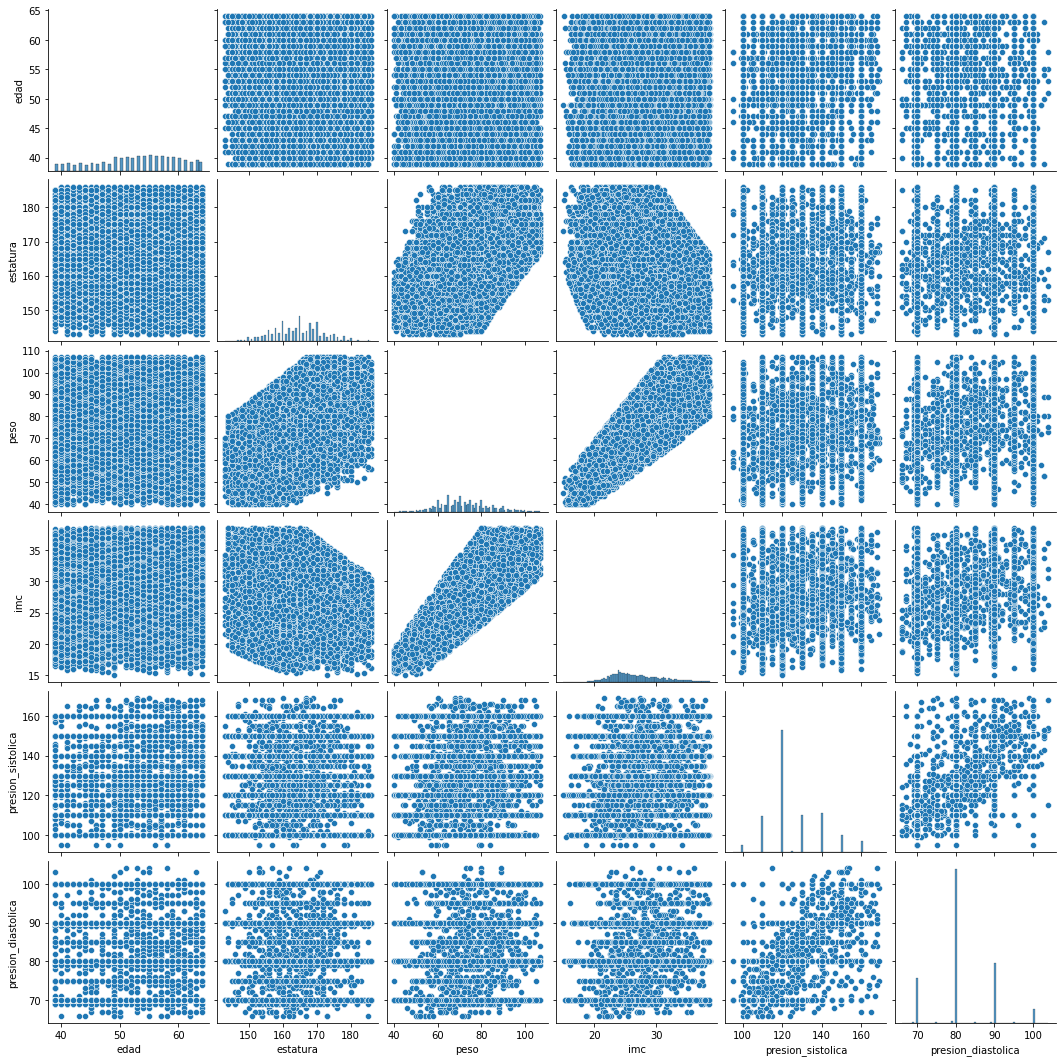

In [151]:
sns.pairplot(df_final_num);

Donde consideres necesario, entrena modelos de Regresión Lineal con un o más pares de variables. Incluso si no te parece que realizar predicciones entre pares de variables tiene sentido para tu proyecto, prueba realizar un par de regresiones para que practiques el procedimiento.

* peso (i) - imc (d)
* estatura (i) - peso (d)
* imc (i) - presion_sistolica (d)

y = 0.5827163327298882 x + -23.210485745356635
R^2: 0.13552804955713948 




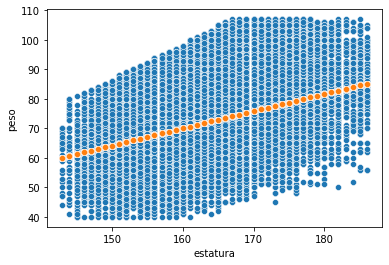

In [189]:
lr = LinearRegression()
lr.fit(X = df_final['estatura'].to_frame(), y = df_final['peso'])

y_predict = lr.predict(df_final['estatura'].to_frame())

intercept = lr.intercept_
coefficient = lr.coef_[0]
print(f'y = {coefficient} x + {intercept}')
print('R^2:', lr.score(X = df_final['estatura'].to_frame(), y = df_final['peso']), '\n\n')

sns.scatterplot(x = df_final['estatura'], y = df_final['peso']);
sns.scatterplot(x = df_final['estatura'], y = y_predict);

y = 0.756049647904232 x + 105.73989541506636
R^2: 0.054076304387463796 




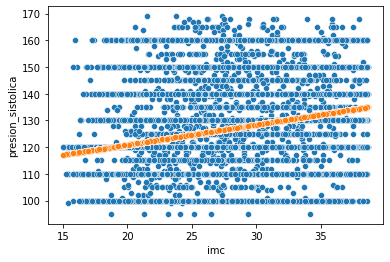

In [188]:
lr = LinearRegression()
lr.fit(X = df_final['imc'].to_frame(), y = df_final['presion_sistolica'])

y_predict = lr.predict(df_final['imc'].to_frame())

intercept = lr.intercept_
coefficient = lr.coef_[0]
print(f'y = {coefficient} x + {intercept}')
print('R^2:', lr.score(X = df_final['imc'].to_frame(), y = df_final['presion_sistolica']), '\n\n')

sns.scatterplot(x = df_final['imc'], y = df_final['presion_sistolica']);
sns.scatterplot(x = df_final['imc'], y = y_predict);

y = 0.2955341421612878 x + 5.374859507538854
R^2: 0.6934485347402611 




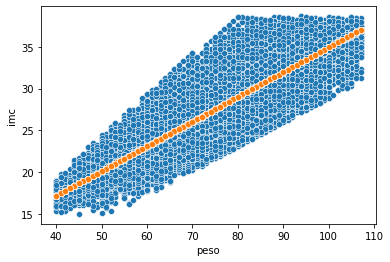

In [190]:
lr = LinearRegression()
lr.fit(X = df_final['peso'].to_frame(), y = df_final['imc'])

y_predict = lr.predict(df_final['peso'].to_frame())

intercept = lr.intercept_
coefficient = lr.coef_[0]
print(f'y = {coefficient} x + {intercept}')
print('R^2:', lr.score(X = df_final['peso'].to_frame(), y = df_final['imc']), '\n\n')

sns.scatterplot(x = df_final['peso'], y =df_final['imc']);
sns.scatterplot(x = df_final['peso'], y = y_predict);